In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification

from logistic_regression import MyLogReg

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/267/banknote+authentication.zip', header=None)
df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'target']
X, y = df.iloc[:,:4], df['target']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
reg = MyLogReg(n_iter=100, metric='precision')

In [5]:
reg

MyLogReg class: n_iter=100, learning_rate=0.1

In [6]:
reg.fit(X_train, y_train, verbose=10)

10| loss: 368.5900267746035, precision: 0.4744525547445255
20| loss: 177.61240016623216, precision: 0.9523809523809523
30| loss: 128.24491347616114, precision: 0.9888641425389755
40| loss: 104.3943479963142, precision: 0.9912472647702407
50| loss: 90.34536535940788, precision: 0.9934924078091106
60| loss: 81.07096710724547, precision: 0.9935622317596566
70| loss: 74.44985366278593, precision: 0.9873949579831933
80| loss: 69.44193546290693, precision: 0.9792099792099792
90| loss: 65.48434440485117, precision: 0.979296066252588
100| loss: 62.24891923212169, precision: 0.979296066252588


In [7]:
reg.get_coef()

array([-1.28016991, -0.5726458 , -0.66637926, -0.0062057 ])

In [8]:
preds = reg.predict(X_test)

In [9]:
confusion_matrix(y_test, preds)

array([[145,   3],
       [  4, 123]])

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='entropy'>

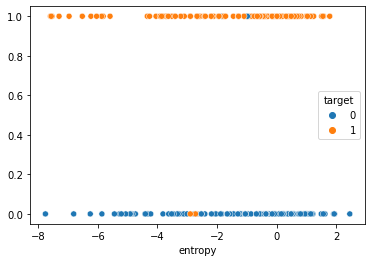

In [11]:
sns.scatterplot(x = X_test['entropy'], y = preds, hue = y_test)

In [12]:
X, y = make_classification(n_samples=1000, n_features=14, n_informative=10, random_state=42)
X = pd.DataFrame(X)
y = pd.Series(y)
X.columns = [f'col_{col}' for col in X.columns]
X_test = X.sample(n=150, random_state = 42)
y_test = y.loc[X_test.index]

In [13]:
reg_2 = MyLogReg(500, learning_rate=0.05, metric='recall', reg='elasticnet', sgd_sample=0.4)

In [14]:
reg_2.fit(X, y, 50)

50| loss: 110.10921587067428, recall: 0.8169014084507042
100| loss: 59.794659632430694, recall: 0.8883248730964467
150| loss: 63.83393070108272, recall: 0.8651162790697674
200| loss: 51.899179988862855, recall: 0.8673469387755102
250| loss: 58.17501238263886, recall: 0.8894472361809045
300| loss: 58.68795925052882, recall: 0.8809523809523809
350| loss: 60.606049857099805, recall: 0.8492462311557789
400| loss: 57.36319052197447, recall: 0.8962264150943396
450| loss: 63.81028084946689, recall: 0.8415841584158416
500| loss: 61.2074958278347, recall: 0.8774509803921569


In [15]:
preds = reg_2.predict(X_test)

In [16]:
confusion_matrix(y_test, preds)

array([[63,  8],
       [ 8, 71]])

In [17]:
reg_2.get_coef()

array([ 0.00316806, -0.02438908,  0.06212684, -0.19244043, -0.8825698 ,
        0.36370181, -0.27435302,  0.49515124,  0.07199296, -0.06570834,
        0.37822872, -0.06692141,  0.0786971 ,  0.8575846 ])

In [18]:
reg_3 = MyLogReg(100, metric='roc_auc')

In [19]:
reg_3.fit(X, y)

In [20]:
preds = reg_3.predict_proba(X_test)

<AxesSubplot:xlabel='col_3'>

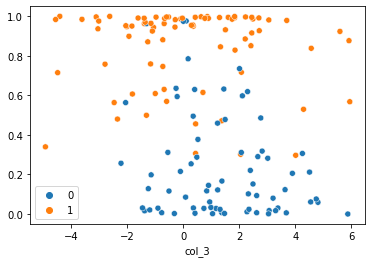

In [21]:
sns.scatterplot(x = X_test['col_3'], y = preds, hue = y_test)